* [<font size=4>Question 1:What are the parameters of GMM?</font>](#1)
* [<font size=4>Question 2:Clustering using GMM</font>](#2)
* [<font size=4>Question 3: Studying the Paramters of GMM </font>](#3)   
* [<font size=4>Question 4: Clustering on iris</font>](#4)  
* [<font size=5>Question 5: How to find the number of components</font>](#5)
* [<font size=5>Question 5: Summary</font>](#5)  

# Question 1: What are the parameters of Gaussian Mixture Model?

* n_component : No of probability distributions
* Covariance_type{‘full’ (default), ‘tied’, ‘diag’, ‘spherical’} Full indicates both have diffrent covariance matrix and tied means same.  
* max_iter int, defaults to 100.
* n_init int, defaults to 1.
* init_params{‘kmeans’, ‘random’}
* verbose_intervalint, default to 10.

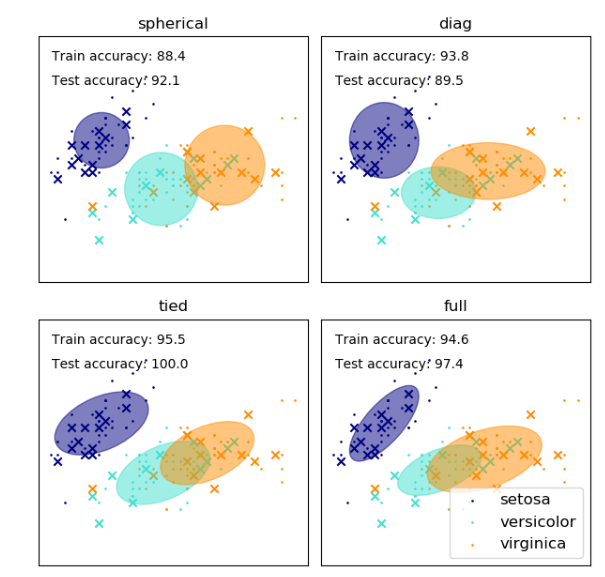

# Question 2: Clsutering on Guassian Mixtures

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn import mixture
from sklearn import datasets
from sklearn.cluster import KMeans


In [2]:
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

### Creating sample data

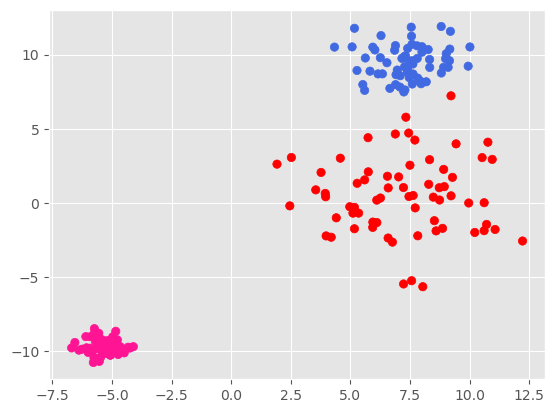

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=8,cluster_std=[1.0, 2.5, 0.5])
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

In [4]:

gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied',max_iter=100,init_params='random')
gmm.fit(X)
yclust=gmm.predict(X)

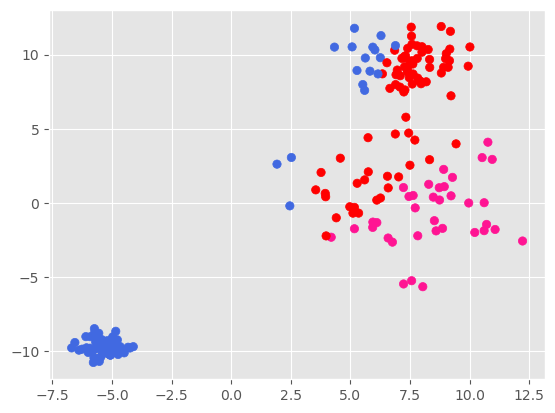

In [5]:
plt.scatter(X[:,0], X[:,1],c=vectorizer(yclust))

# Question 3: Effect of different paramters

In [6]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied',max_iter=100,init_params='random')
gmm.fit(X)
yclust=gmm.predict(X)

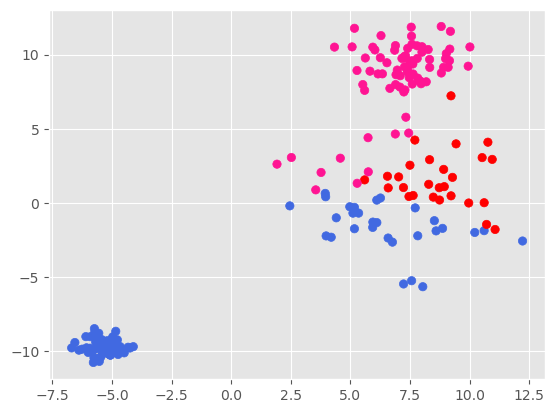

In [7]:
plt.scatter(X[:,0], X[:,1],c=vectorizer(yclust))

# Queston 4: Clustering on iris dataset

### Cluster Evaluation using Purity

In [8]:

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [9]:
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [10]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
lab=list()
pure=list()
gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied',max_iter=10,init_params='random')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Random 10 tied')
pure.append(purity_score(y,yclust))

In [13]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
print(gmm.predict_proba(x))

[[0.31713264 0.36465185 0.31821552]
 [0.31379303 0.36023281 0.32597416]
 [0.32044161 0.35119173 0.32836666]
 [0.33062323 0.3385468  0.33082997]
 [0.3227204  0.35788853 0.31939107]
 [0.316914   0.36838071 0.31470529]
 [0.32680326 0.34179912 0.33139762]
 [0.32298483 0.35612069 0.32089448]
 [0.32887325 0.33475879 0.33636796]
 [0.32587785 0.35174902 0.32237314]
 [0.31508583 0.37408794 0.31082623]
 [0.33444963 0.34104155 0.32450882]
 [0.32285346 0.35199489 0.32515165]
 [0.32687768 0.33818306 0.33493926]
 [0.29383264 0.40610421 0.30006315]
 [0.30770576 0.38733728 0.30495696]
 [0.29943934 0.38620228 0.31435838]
 [0.31157361 0.36752066 0.32090573]
 [0.30976335 0.3834148  0.30682185]
 [0.32216879 0.3592071  0.31862411]
 [0.31774396 0.36916362 0.31309242]
 [0.31450224 0.36337872 0.32211904]
 [0.31901865 0.35366019 0.32732116]
 [0.30948605 0.36261678 0.32789717]
 [0.34796417 0.32820729 0.32382854]
 [0.31908918 0.35694577 0.32396505]
 [0.31616722 0.3574469  0.32638588]
 [0.31803083 0.36571648 0.31

In [15]:
np.sum(gmm.predict_proba(x), axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
pure

[0.6066666666666667]

In [17]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied',max_iter=100,init_params='random')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Random 100 tied')
pure.append(purity_score(y,yclust))

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=10,init_params='random')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Random 10 full')
pure.append(purity_score(y,yclust))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [18]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='random')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Random 100 full')
pure.append(purity_score(y,yclust))

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='kmeans')
gmm.fit(x)
yclust=gmm.predict(x)
lab.append('Init kmeans 100 full')
pure.append(purity_score(y,yclust))

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
yclust = kmeans.fit_predict(x)
lab.append('kmeans')
pure.append(purity_score(y,yclust))

In [20]:
yclust.shape

(150,)

<AxesSubplot:title={'center':'EM with various paramters'}, ylabel='Method'>

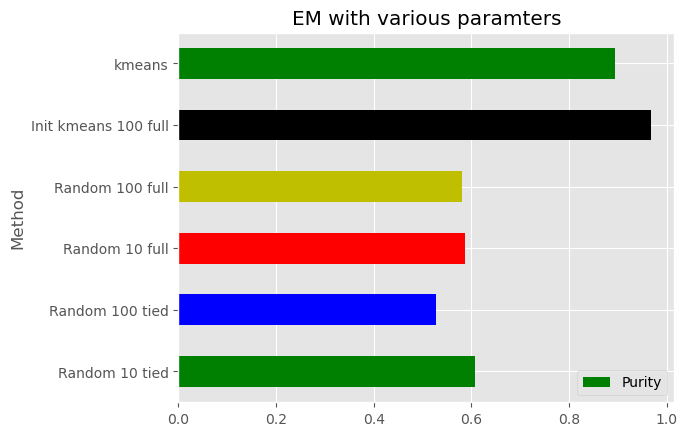

In [21]:
d = {'Method':lab,'Purity':pure}
import pandas as pd
df = pd.DataFrame(d)
df.plot.barh(x='Method',y='Purity',title='EM with various paramters', color=tuple(["g", "b","r","y","k"]))

# Question 5: How to determine number of componets?

### BIC has two components

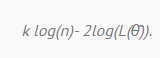

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


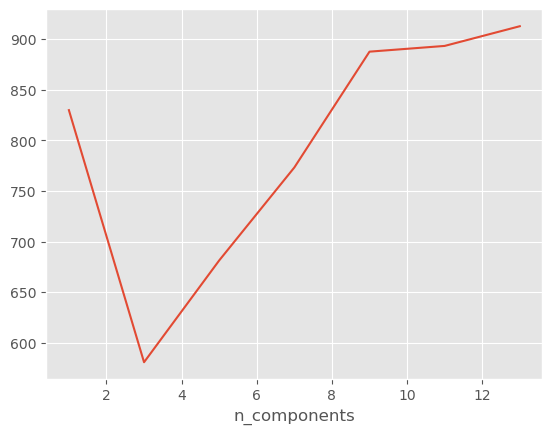

In [22]:
n_components = np.arange(1, 15,2)

models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x)
          for n in n_components]
plt.plot(n_components, [m.bic(x) for m in models], label='BIC')
plt.xlabel('n_components');

Summary
----

- Gaussian Mixture Models (GMM) take our old friend the Gaussian and add another Gaussian(s).
- This allows us to model more complex data.
- We fit a GMM with the Expectation–Maximization (EM) Algorithm.
- Expectation–Maximization (EM) Algorithm is a series of steps to find good parameter estimates when there are latent variables.
- EM steps:
    1. Initialize the parameter estimates
    2. Given the current parameter estimates, find the min log likelihood for Z (data+latent variables)
    3. Given the current data, find better parameter estimates
    3. Repeat steps 2 & 3
- EM can be used beyond GMM
- GMM work well but you have to guess the number of Gaussians. Kernel Density Estimation (KDE) does __not__ require that kind of guessing 